In [1]:
import matplotlib.pyplot as plt
from matplotlib import colors
import matplotlib as mpl 
mpl.rcParams["image.origin"] = 'lower'
# mpl.rcParams["image.dpi"] = '100'
from sklearn.metrics import auc
import os
import numpy as np
import pandas as pd
from plotting import * 

import mplhep as hep
plt.style.use(hep.style.CMS)

In [2]:
df_ele1 = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v18/run_01/validation_data/validation_dataset_v11_ele.csv", sep=";")
df_gamma1 = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v18/run_01/validation_data/validation_dataset_v11_gamma.csv", sep=";")
# df_nomatch = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v11/run_01/en_regr/run_01/validation_data/validation_dataset_v10_nomatch.csv", sep=";")

In [3]:
df_ele2 = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/MultiSA_v2/run_03/validation_data/validation_dataset_ele.csv", sep=";")
df_gamma2 = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/MultiSA_v2/run_03/validation_data/validation_dataset_gamma.csv", sep=";")
# df_nomatch = pd.read_csv("/eos/user/d/dvalsecc/www/ECAL/Clustering/DeepCluster/models_archive/gcn_models/gcn_models_SA_v11/run_01/en_regr/run_01/validation_data/validation_dataset_v10_nomatch.csv", sep=";")

In [4]:
def bin_analysis(col):
    def f(df):
        m = df[col].mean()
        A = (df[col].quantile(0.84) - df[col].quantile(0.16))/2
        B = (df[col].quantile(0.025) - df[col].quantile(0.975))/2
        return pd.Series({
            "m": m,
            "w68": A,
            "w95": B,
            "N": df[col].count()
        })
    return f

In [5]:
import mplhep as hep
plt.style.use(hep.style.CMS)

# Comparison

Text(0.01, 1.02, 'MultiSA / SingleSA')

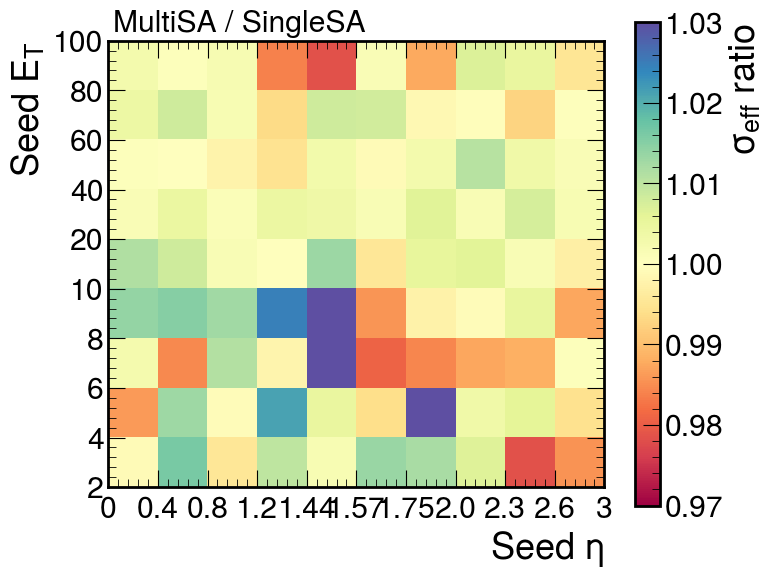

In [9]:
fig, axs = plt.subplots(1,1, figsize=(8, 8),dpi=100, )
plt.subplots_adjust( wspace=0.2)

ets = [2,4,6,8,10,20,40,60,80,100]
etas = [0, 0.4,0.8, 1.2,1.44, 1.57, 1.75,2.,2.3,2.6,3]
df_ele1["et_bin"] = pd.cut(df_ele1.et_seed, ets, labels=list(range(len(ets)-1)))
df_ele1["eta_bin"] = pd.cut(df_ele1.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))
df_ele2["et_bin"] = pd.cut(df_ele2.et_seed, ets, labels=list(range(len(ets)-1)))
df_ele2["eta_bin"] = pd.cut(df_ele2.seed_eta.abs(), etas, labels=list(range(len(etas)-1)))


res_ele_1 = df_ele1.groupby(["eta_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_ele_1.reset_index(level=0, inplace=True)
res_ele_1.reset_index(level=0, inplace=True)


res_ele_2 = df_ele2.groupby(["eta_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_ele_2.reset_index(level=0, inplace=True)
res_ele_2.reset_index(level=0, inplace=True)


vmax= 1.03
vmin = 0.97
palette = "Spectral"

a1 = res_ele_1.w68.values.reshape((len(etas)-1,len(ets)-1))
a1[a1==0] = np.nan

a2 = res_ele_2.w68.values.reshape((len(etas)-1,len(ets)-1))
a2[a2==0] = np.nan


ax = axs
A = ax.imshow( (a2/a1).T,  cmap=palette , vmin=vmin, vmax=vmax)
ax.set_xlabel("Seed $\eta$")
ax.set_ylabel("Seed $E_T$")
fig.colorbar(A , label="$\sigma_{eff}$ ratio", ax=ax, shrink=0.8)
ax.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(etas))- 0.5, minor=False)
ax.set_yticklabels(ets)
ax.set_xticklabels(etas)
# ax.text(0.75, 1.02, "Electron", transform=ax.transAxes,  fontsize="small")
ax.text(0.01, 1.02, "MultiSA / SingleSA", transform=ax.transAxes,  fontsize="small")



Text(0.01, 1.02, 'MultiSA / SingleSA')

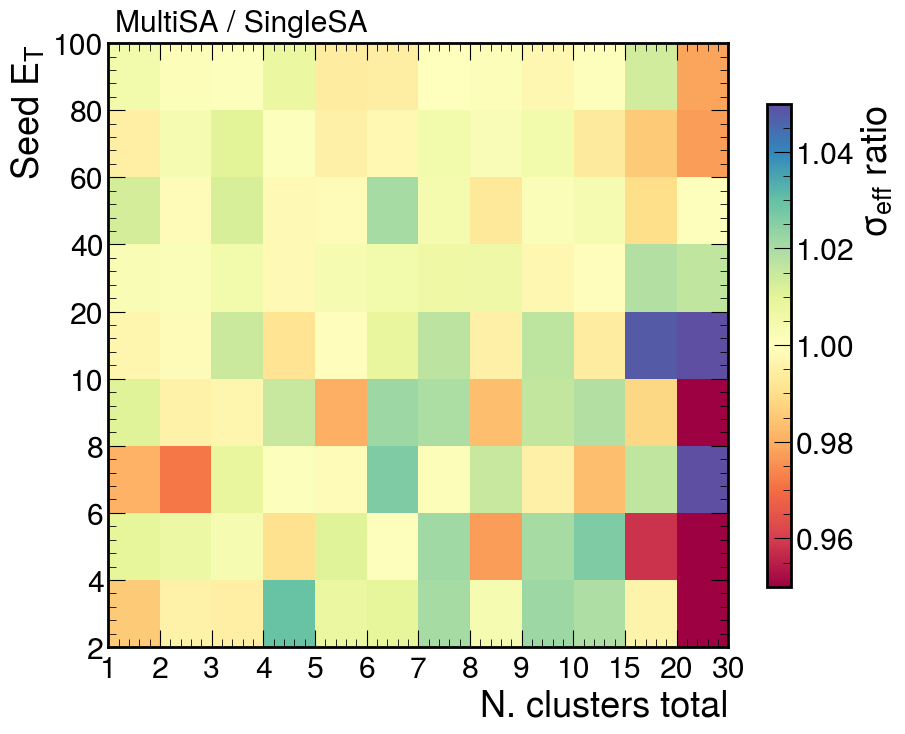

In [10]:
fig, axs = plt.subplots(1,1, figsize=(10, 8),dpi=100, )
plt.subplots_adjust( wspace=0.2)

ets = [2,4,6,8,10,20,40,60,80,100]
ncls = [1,2,3,4,5,6,7,8,9,10,15,20,30]
df_ele1["et_bin"] = pd.cut(df_ele1.et_seed, ets, labels=list(range(len(ets)-1)))
df_ele1["ncl_bin"] = pd.cut(df_ele1.ncls, ncls, labels=list(range(len(ncls)-1)))
df_ele2["et_bin"] = pd.cut(df_ele2.et_seed, ets, labels=list(range(len(ets)-1)))
df_ele2["ncl_bin"] = pd.cut(df_ele2.ncls, ncls, labels=list(range(len(ncls)-1)))


res_ele_1 = df_ele1.groupby(["ncl_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_ele_1.reset_index(level=0, inplace=True)
res_ele_1.reset_index(level=0, inplace=True)


res_ele_2 = df_ele2.groupby(["ncl_bin","et_bin"]).apply(bin_analysis("En_ovEtrue_sim_good"))
res_ele_2.reset_index(level=0, inplace=True)
res_ele_2.reset_index(level=0, inplace=True)


vmax= 1.05
vmin = 0.95
palette = "Spectral"

a1 = res_ele_1.w68.values.reshape((len(ncls)-1,len(ets)-1))
a1[a1==0] = np.nan

a2 = res_ele_2.w68.values.reshape((len(ncls)-1,len(ets)-1))
a2[a2==0] = np.nan


ax = axs
A = ax.imshow( (a2/a1).T,  cmap=palette , vmin=vmin, vmax=vmax, aspect="auto")
ax.set_xlabel("N. clusters total")
ax.set_ylabel("Seed $E_T$")
fig.colorbar(A , label="$\sigma_{eff}$ ratio", ax=ax, shrink=0.8)
ax.set_yticks(np.arange(len(ets)) - 0.5, minor=False)
ax.set_xticks(np.arange(len(ncls))- 0.5, minor=False)
ax.set_yticklabels(ets)
ax.set_xticklabels(ncls)
# ax.text(0.75, 1.02, "Electron", transform=ax.transAxes,  fontsize="small")
ax.text(0.01, 1.02, "MultiSA / SingleSA", transform=ax.transAxes,  fontsize="small")

